In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as _time
from datetime import datetime, timedelta 
import string

In [3]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")
storms = pd.read_csv("StormEvents2015.csv", sep=';')

In [4]:
train.head(5)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [5]:
airports.head(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


### Storm data preparation

In [6]:
storms.head(5)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,"END_LON,,,,"
0,201501,27,1200,201501,28,400,92561,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
1,201501,24,700,201501,24,2100,92625,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
2,201501,27,600,201501,27,1200,92561,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
3,201502,14,800,201502,15,1700,93895,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
4,201502,7,2200,201502,10,500,93902,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"


In [8]:
print("Number of columns: {}". format(len(storms.columns)))
print("Number of records: {}". format(len(storms)))

Number of columns: 40
Number of records: 42197


In [9]:
storms.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'STATE', 'STATE_FIPS', 'YEAR',
       'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO',
       'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'MAGNITUDE',
       'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON,,,,'],
      dtype='object')

In [10]:
storms['STATE'] = storms['STATE'].replace(['NEW HAMPSHIRE'],'NH')
storms['STATE'] = storms['STATE'].replace(['ARKANSAS'],'AR')
storms['STATE'] = storms['STATE'].replace(['OKLAHOMA'],'OK')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'TX')
storms['STATE'] = storms['STATE'].replace(['ALABAMA'],'AL')
storms['STATE'] = storms['STATE'].replace(['ALASKA'],'AK')
storms['STATE'] = storms['STATE'].replace(['ARIZONA'],'AZ')
storms['STATE'] = storms['STATE'].replace(['CALIFORNIA'],'CA')
storms['STATE'] = storms['STATE'].replace(['COLORADO'],'CO')
storms['STATE'] = storms['STATE'].replace(['CONNECTICUT'],'CT')
storms['STATE'] = storms['STATE'].replace(['DELAWARE'],'DE')
storms['STATE'] = storms['STATE'].replace(['FLORIDA'],'FL')
storms['STATE'] = storms['STATE'].replace(['GEORGIA'],'GA')
storms['STATE'] = storms['STATE'].replace(['HAWAII'],'HI')
storms['STATE'] = storms['STATE'].replace(['IDAHO'],'ID')
storms['STATE'] = storms['STATE'].replace(['ILLINOIS'],'IL')
storms['STATE'] = storms['STATE'].replace(['INDIANA'],'IN')
storms['STATE'] = storms['STATE'].replace(['IOWA'],'IA')
storms['STATE'] = storms['STATE'].replace(['KANSAS'],'KS')
storms['STATE'] = storms['STATE'].replace(['KENTUCKY'],'KY')
storms['STATE'] = storms['STATE'].replace(['LOUISIANA'],'LA')
storms['STATE'] = storms['STATE'].replace(['MAINE'],'ME')
storms['STATE'] = storms['STATE'].replace(['MARYLAND'],'MD')
storms['STATE'] = storms['STATE'].replace(['MASSACHUSETTS'],'MA')
storms['STATE'] = storms['STATE'].replace(['MICHIGAN'],'MI')
storms['STATE'] = storms['STATE'].replace(['MINNESOTA'],'MN')
storms['STATE'] = storms['STATE'].replace(['MISSISSIPPI'],'MS')
storms['STATE'] = storms['STATE'].replace(['MISSOURI'],'MO')
storms['STATE'] = storms['STATE'].replace(['MONTANA'],'MT')
storms['STATE'] = storms['STATE'].replace(['NEBRASKA'],'NE')
storms['STATE'] = storms['STATE'].replace(['NEVADA'],'NV')
storms['STATE'] = storms['STATE'].replace(['NEW JERSEY'],'NJ')
storms['STATE'] = storms['STATE'].replace(['NEW MEXICO'],'NM')
storms['STATE'] = storms['STATE'].replace(['NEW YORK'],'NY')
storms['STATE'] = storms['STATE'].replace(['NORTH CAROLINA'],'NC')
storms['STATE'] = storms['STATE'].replace(['NORTH DAKOTA'],'ND')
storms['STATE'] = storms['STATE'].replace(['OHIO'],'OH')
storms['STATE'] = storms['STATE'].replace(['OREGON'],'OR')
storms['STATE'] = storms['STATE'].replace(['PENSSYLVANIA'],'PA')
storms['STATE'] = storms['STATE'].replace(['RHODE ISLAND'],'RI')
storms['STATE'] = storms['STATE'].replace(['SOUTH DAKOTA'],'SD')
storms['STATE'] = storms['STATE'].replace(['TENNESSEE'],'MO')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'MT')
storms['STATE'] = storms['STATE'].replace(['UTAH'],'UT')
storms['STATE'] = storms['STATE'].replace(['VERMONT'],'VT')
storms['STATE'] = storms['STATE'].replace(['VIRGINIA'],'VA')
storms['STATE'] = storms['STATE'].replace(['WASHINGTON'],'WA')
storms['STATE'] = storms['STATE'].replace(['WEST VIRGINIA'],'WV')
storms['STATE'] = storms['STATE'].replace(['WISCONSIN'],'WI')
storms['STATE'] = storms['STATE'].replace(['WYOMING'],'WY')

storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['January'], '1')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['February'], '2')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['March'], '3')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['April'], '4')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['May'], '5')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['June'], '6')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['July'], '7')

In [11]:
storms.head(5)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,"END_LON,,,,"
0,201501,27,1200,201501,28,400,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
1,201501,24,700,201501,24,2100,92625,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
2,201501,27,600,201501,27,1200,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
3,201502,14,800,201502,15,1700,93895,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
4,201502,7,2200,201502,10,500,93902,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"


In [12]:
storms['BEGIN_MONTH'] = [str(storms['BEGIN_YEARMONTH'][i])[-1] for i in range(len(storms['BEGIN_YEARMONTH']))]
storms['END_MONTH'] = [str(storms['END_YEARMONTH'][i])[-1] for i in range(len(storms['END_YEARMONTH']))]

### Merging storm data with train data on origin states

In [13]:
origin = pd.merge(train[['YEAR', 'MONTH', 'DAY', 'ORIGIN_AIRPORT']], airports[['IATA_CODE','STATE']], how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')


In [14]:
storms['BEGIN_MONTH'] = storms['BEGIN_MONTH'].astype(int)

In [15]:
storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42197 entries, 0 to 42196
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YEAR         42197 non-null  int64 
 1   BEGIN_DAY    42197 non-null  int64 
 2   BEGIN_MONTH  42197 non-null  int64 
 3   END_DAY      42197 non-null  int64 
 4   END_MONTH    42197 non-null  object
 5   STATE        42197 non-null  object
 6   EVENT_TYPE   42197 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.3+ MB


In [16]:
origin_storm_1 = pd.merge(origin[:1000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [17]:
origin_storm_1 = origin_storm_1[(origin_storm_1['DAY'] >= origin_storm_1['BEGIN_DAY']) & (origin_storm_1['DAY'] <= origin_storm_1['END_DAY'])]


In [18]:
origin_storm_1.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
1,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
2,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
3,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
4,2015,1,1,FAI,FAI,AK,1,1,2,1,Winter Storm


In [19]:
origin_storm_2 = pd.merge(origin[1000000:2000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [20]:
origin_storm_2 = origin_storm_2[(origin_storm_2['DAY'] >= origin_storm_2['BEGIN_DAY']) & (origin_storm_2['DAY'] <= origin_storm_2['END_DAY'])]


In [21]:
origin_storm_2.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
1,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
2,2015,3,9,DFW,DFW,TX,9,3,9,3,Flood
3,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
4,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood


In [22]:
origin_storm_3 = pd.merge(origin[2000000:], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [23]:
origin_storm_3 = origin_storm_3[(origin_storm_3['DAY'] >= origin_storm_3['BEGIN_DAY']) & (origin_storm_3['DAY'] <= origin_storm_3['END_DAY'])]


In [24]:
origin_storm_3.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
1,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
2,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
3,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
4,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind


In [25]:
origin_storm = pd.concat([origin_storm_1, origin_storm_2, origin_storm_3], join="outer")

In [26]:
origin_storm = origin_storm.drop_duplicates()

In [27]:
origin_storm = origin_storm.reset_index()

In [28]:
origin_storm = origin_storm.drop('index', axis=1)
origin_storm.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
1,2015,1,1,FAI,FAI,AK,1,1,2,1,Winter Storm
2,2015,1,1,JNU,JNU,AK,1,1,2,1,Winter Storm
3,2015,1,1,OTZ,OTZ,AK,1,1,2,1,Winter Storm
4,2015,1,1,KTN,KTN,AK,1,1,2,1,Winter Storm


### Merging storm data with train data on destination states

In [29]:
dest = pd.merge(train[['YEAR', 'MONTH', 'DAY', 'DESTINATION_AIRPORT']], airports[['IATA_CODE','STATE']], how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')


In [30]:
dest.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE
0,2015,1,1,SEA,SEA,WA
1,2015,1,1,PBI,PBI,FL
2,2015,1,1,CLT,CLT,NC
3,2015,1,1,MIA,MIA,FL
4,2015,1,1,ANC,ANC,AK


In [31]:
dest_storm_1 = pd.merge(dest[:1000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [32]:
dest_storm_1 = dest_storm_1[(dest_storm_1['DAY'] >= dest_storm_1['BEGIN_DAY']) & (dest_storm_1['DAY'] <= dest_storm_1['END_DAY'])]


In [33]:
dest_storm_1.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,PBI,PBI,FL,1,1,4,1,High Surf
1,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
2,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
3,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
4,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf


In [34]:
dest_storm_2 = pd.merge(dest[1000000:2000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [35]:
dest_storm_2 = dest_storm_2[(dest_storm_2['DAY'] >= dest_storm_2['BEGIN_DAY']) & (dest_storm_2['DAY'] <= dest_storm_2['END_DAY'])]


In [36]:
dest_storm_2.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
1,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
2,2015,3,9,DFW,DFW,TX,9,3,9,3,Flood
3,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
4,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood


In [37]:
dest_storm_3 = pd.merge(dest[2000000:], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [38]:
dest_storm_3 = dest_storm_3[(dest_storm_3['DAY'] >= dest_storm_3['BEGIN_DAY']) & (dest_storm_3['DAY'] <= dest_storm_3['END_DAY'])]


In [39]:
dest_storm_3.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
1,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
2,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
3,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
4,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind


In [40]:
dest_storm = pd.concat([dest_storm_1, dest_storm_2, dest_storm_3], join="outer")

In [41]:
dest_storm = dest_storm.drop_duplicates()

In [42]:
dest_storm = dest_storm.reset_index()

In [43]:
dest_storm = dest_storm.drop('index', axis=1)
dest_storm.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,PBI,PBI,FL,1,1,4,1,High Surf
1,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
2,2015,1,1,FLL,FLL,FL,1,1,4,1,High Surf
3,2015,1,1,MCO,MCO,FL,1,1,4,1,High Surf
4,2015,1,1,TPA,TPA,FL,1,1,4,1,High Surf


### One-hot encoding event_type

In [44]:
origin_storm['ORIGIN_EVENT_FL'] = np.where(origin_storm['EVENT_TYPE'].isnull() == False, 1, 0)
dest_storm['DEST_EVENT_FL'] = np.where(dest_storm['EVENT_TYPE'].isnull() == False, 1, 0)

In [45]:
dest_storm.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE,DEST_EVENT_FL
0,2015,1,1,PBI,PBI,FL,1,1,4,1,High Surf,1
1,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf,1
2,2015,1,1,FLL,FLL,FL,1,1,4,1,High Surf,1
3,2015,1,1,MCO,MCO,FL,1,1,4,1,High Surf,1
4,2015,1,1,TPA,TPA,FL,1,1,4,1,High Surf,1


In [46]:
origin_storm.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE,ORIGIN_EVENT_FL
0,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm,1
1,2015,1,1,FAI,FAI,AK,1,1,2,1,Winter Storm,1
2,2015,1,1,JNU,JNU,AK,1,1,2,1,Winter Storm,1
3,2015,1,1,OTZ,OTZ,AK,1,1,2,1,Winter Storm,1
4,2015,1,1,KTN,KTN,AK,1,1,2,1,Winter Storm,1


In [47]:
origin.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE
0,2015,1,1,ANC,ANC,AK
1,2015,1,1,LAX,LAX,CA
2,2015,1,1,SFO,SFO,CA
3,2015,1,1,LAX,LAX,CA
4,2015,1,1,SEA,SEA,WA


In [48]:
print(len(origin_storm))
print(len(origin_storm[['YEAR', 'MONTH', 'DAY', 'STATE','ORIGIN_EVENT_FL']].drop_duplicates()))

41848
2611


In [49]:
otemp = origin_storm[['YEAR', 'MONTH', 'DAY', 'STATE','ORIGIN_EVENT_FL']].drop_duplicates()
dtemp = dest_storm[['YEAR', 'MONTH', 'DAY', 'STATE','DEST_EVENT_FL']].drop_duplicates()

print(otemp.info())
print(dtemp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 0 to 41846
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   YEAR             2611 non-null   int64 
 1   MONTH            2611 non-null   int64 
 2   DAY              2611 non-null   int64 
 3   STATE            2611 non-null   object
 4   ORIGIN_EVENT_FL  2611 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 122.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 41773
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YEAR           2615 non-null   int64 
 1   MONTH          2615 non-null   int64 
 2   DAY            2615 non-null   int64 
 3   STATE          2615 non-null   object
 4   DEST_EVENT_FL  2615 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 122.6+ KB
None


In [50]:
otr = pd.merge(train, airports[['IATA_CODE','STATE']], how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
otr = otr.drop(columns='IATA_CODE', axis=1)
otr = otr.rename(columns={'STATE':'ORIGIN_STATE'})

dtr = pd.merge(otr, airports[['IATA_CODE','STATE']], how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
dtr = dtr.drop(columns='IATA_CODE', axis=1)
dtr = dtr.rename(columns={'STATE':'DESTINATION_STATE'})

In [51]:
print(len(train))
print(len(dtr))

2818553
2818553


In [52]:
dtr.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,AK,WA
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,CA,FL
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,CA,NC
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,CA,FL
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,WA,AK


In [53]:
# Merge for origin state events
train_evnt = pd.merge(dtr, otemp, how='left', left_on=['YEAR', 'MONTH', 'DAY', 'ORIGIN_STATE'], right_on=['YEAR', 'MONTH', 'DAY', 'STATE'])
train_evnt = train_evnt.drop(columns='STATE', axis=1)

In [54]:
# Merge for destination state events
train_evntf = pd.merge(train_evnt, dtemp, how='left', left_on=['YEAR', 'MONTH', 'DAY', 'DESTINATION_STATE'], right_on=['YEAR', 'MONTH', 'DAY', 'STATE'])
train_evntf = train_evntf.drop(columns='STATE', axis=1)

In [55]:
print(len(train))
print(len(train_evntf))
train_evntf.head()

2818553
2818553


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,21.0,15.0,205.0,1448,430,-22.0,AK,WA,1.0,NaN
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,FL,1.0,1.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,16.0,34.0,286.0,2296,806,5.0,CA,NC,1.0,NaN
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,30.0,285.0,2342,805,-9.0,CA,FL,1.0,1.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,11.0,35.0,235.0,1448,320,-21.0,WA,AK,NaN,1.0


In [56]:
# One-hot re-encoding
train_evntf['ORIGIN_EVENT_FL'] = np.where(train_evntf['ORIGIN_EVENT_FL'].isnull() == False, 1, 0)
train_evntf['DEST_EVENT_FL'] = np.where(train_evntf['DEST_EVENT_FL'].isnull() == False, 1, 0)

In [57]:
train_evntf.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,21.0,15.0,205.0,1448,430,-22.0,AK,WA,1,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,FL,1,1
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,16.0,34.0,286.0,2296,806,5.0,CA,NC,1,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,30.0,285.0,2342,805,-9.0,CA,FL,1,1
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,11.0,35.0,235.0,1448,320,-21.0,WA,AK,0,1


In [58]:
train_evntf.to_csv("StormTrainData.csv")

### Feature engineering

(Number of delayed flights in a particular airport)/(Number of all flights in a particular airport)

#### Proportion of delays in origin airports

In [59]:
test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912


In [60]:
numfl = train_evntf.groupby('ORIGIN_AIRPORT')['AIRLINE'].count()
numdelfl = train_evntf[train_evntf['ARRIVAL_DELAY'] > 0].groupby('ORIGIN_AIRPORT')['AIRLINE'].count()

In [61]:
numfl = pd.DataFrame(numfl)
numfl = numfl.rename(columns={'AIRLINE':'AIRLINE_NUM'})

numdelfl = pd.DataFrame(numdelfl)
numdelfl = numdelfl.rename(columns={'AIRLINE':'AIRLINE_DEL_NUM'})

In [62]:
print(len(numfl))
print(len(numdelfl))

322
322


In [63]:
fl = pd.merge(numfl, numdelfl, how='inner', on='ORIGIN_AIRPORT')
print(len(fl))
fl.head()

322


,AIRLINE_NUM,AIRLINE_DEL_NUM
ORIGIN_AIRPORT,,
ABE,1168,501
ABI,1238,473
ABQ,10014,3847
ABR,357,112
ABY,476,169


In [64]:
fl['ORIGIN_DEL_PROP'] = fl['AIRLINE_DEL_NUM']/fl['AIRLINE_NUM']
fl.head()

,AIRLINE_NUM,AIRLINE_DEL_NUM,ORIGIN_DEL_PROP
ORIGIN_AIRPORT,,,
ABE,1168,501,0.428938
ABI,1238,473,0.382068
ABQ,10014,3847,0.384162
ABR,357,112,0.313725
ABY,476,169,0.355042


In [65]:
test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912


In [66]:
train_evnt2 = pd.merge(train_evntf, fl, how='left', on='ORIGIN_AIRPORT')
test2 = pd.merge(test, fl, how='left', on='ORIGIN_AIRPORT')

In [67]:
train_evnt2.head()
test2.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_NUM,AIRLINE_DEL_NUM,ORIGIN_DEL_PROP
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,71010,30081,0.423616
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,76788,31399,0.408905
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,103511,44871,0.433490
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,71010,30081,0.423616
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,7888,2509,0.318078


In [68]:
train_evnt3 = train_evnt2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])
test3 = test2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])

In [69]:
test3.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,0.423616
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,0.408905
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,0.433490
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,0.423616
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,0.318078


In [70]:
train_evnt3.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL,ORIGIN_DEL_PROP
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,15.0,205.0,1448,430,-22.0,AK,WA,1,0,0.318078
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,14.0,280.0,2330,750,-9.0,CA,FL,1,1,0.433490
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,34.0,286.0,2296,806,5.0,CA,NC,1,0,0.408905
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,30.0,285.0,2342,805,-9.0,CA,FL,1,1,0.433490
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,35.0,235.0,1448,320,-21.0,WA,AK,0,1,0.378185


#### Proportion of delays in destination airports

In [71]:
numfl = train_evntf.groupby('DESTINATION_AIRPORT')['AIRLINE'].count()
numdelfl = train_evntf[train_evntf['ARRIVAL_DELAY'] > 0].groupby('DESTINATION_AIRPORT')['AIRLINE'].count()

In [72]:
numfl = pd.DataFrame(numfl)
numfl = numfl.rename(columns={'AIRLINE':'AIRLINE_NUM'})

numdelfl = pd.DataFrame(numdelfl)
numdelfl = numdelfl.rename(columns={'AIRLINE':'AIRLINE_DEL_NUM'})

In [73]:
print(len(numfl))
print(len(numdelfl))

322
322


In [74]:
fl = pd.merge(numfl, numdelfl, how='inner', on='DESTINATION_AIRPORT')
print(len(fl))
fl.head()

322


,AIRLINE_NUM,AIRLINE_DEL_NUM
DESTINATION_AIRPORT,,
ABE,1167,458
ABI,1233,534
ABQ,10046,4396
ABR,353,67
ABY,476,193


In [75]:
fl['DEST_DEL_PROP'] = fl['AIRLINE_DEL_NUM']/fl['AIRLINE_NUM']
fl.head()

,AIRLINE_NUM,AIRLINE_DEL_NUM,DEST_DEL_PROP
DESTINATION_AIRPORT,,,
ABE,1167,458,0.392459
ABI,1233,534,0.433090
ABQ,10046,4396,0.437587
ABR,353,67,0.189802
ABY,476,193,0.405462


In [76]:
train_evnt2 = pd.merge(train_evnt3, fl, how='left', on='DESTINATION_AIRPORT')
test2 = pd.merge(test3, fl, how='left', on='DESTINATION_AIRPORT')

In [77]:
train_evnt2.head()
#test2.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL,ORIGIN_DEL_PROP,AIRLINE_NUM,AIRLINE_DEL_NUM,DEST_DEL_PROP
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,430,-22.0,AK,WA,1,0,0.318078,55773,19337,0.346709
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,750,-9.0,CA,FL,1,1,0.433490,12932,5299,0.409759
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,806,5.0,CA,NC,1,0,0.408905,53097,20148,0.379456
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,805,-9.0,CA,FL,1,1,0.433490,37784,15002,0.397046
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,320,-21.0,WA,AK,0,1,0.378185,7901,2738,0.346538


In [78]:
train_evnt4 = train_evnt2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])
test4 = test2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])

In [79]:
test4.head()
train_evnt4.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL,ORIGIN_DEL_PROP,DEST_DEL_PROP
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,205.0,1448,430,-22.0,AK,WA,1,0,0.318078,0.346709
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,280.0,2330,750,-9.0,CA,FL,1,1,0.433490,0.409759
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,286.0,2296,806,5.0,CA,NC,1,0,0.408905,0.379456
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,285.0,2342,805,-9.0,CA,FL,1,1,0.433490,0.397046
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,235.0,1448,320,-21.0,WA,AK,0,1,0.378185,0.346538


### Departure delay calculator

In [80]:
def dep_whoff(dataset):
    dep = (dataset.WHEELS_OFF-dataset.WHEELS_OFF%100)*60/100 + dataset.WHEELS_OFF%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_whoff = dep_whoff(train_evnt4)
train_whoff.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,1448,430,-22.0,AK,WA,1,0,0.318078,0.346709,10.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,2330,750,-9.0,CA,FL,1,1,0.433490,0.409759,4.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,2296,806,5.0,CA,NC,1,0,0.408905,0.379456,14.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,2342,805,-9.0,CA,FL,1,1,0.433490,0.397046,10.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,1448,320,-21.0,WA,AK,0,1,0.378185,0.346538,10.0


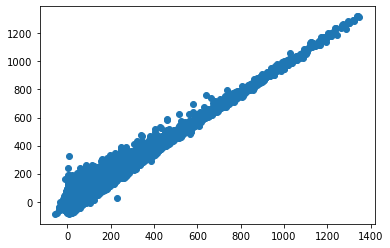

In [81]:
train_whoff = train_whoff[400 + train_whoff.DEPARTURE_DELAY > train_whoff.ARRIVAL_DELAY]
plt.scatter(train_whoff.DEPARTURE_DELAY, train_whoff.ARRIVAL_DELAY)

In [82]:
test_w = dep_whoff(test4)
test_w.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,0.423616,0.427695,49.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,0.408905,0.379456,16.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,0.433490,0.420603,31.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,0.423616,0.371277,62.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,0.318078,0.426545,29.0


In [83]:
airline = airlines.IATA_CODE.sort_values().values
airport = airports.IATA_CODE.sort_values().values

In [84]:
#train

train_airline = train_whoff.sort_values(by = 'AIRLINE').set_index('AIRLINE')

for l in airline:
    train_airline.loc[l, 'AL_DELAY_MEAN'] = train_airline.loc[l, 'DEPARTURE_DELAY'].mean()
    None
    
train_or = train_airline.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')

for a in airport:
    train_or.loc[a, 'OR_DELAY_MEAN'] = train_or.loc[a, 'DEPARTURE_DELAY'].mean()
    None

train_des = train_or.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    train_des.loc[a, 'DES_DELAY_MEAN'] = train_des.loc[a, 'DEPARTURE_DELAY'].mean()
    None

train_fin = train_des.sort_values(by = 'id').reset_index().set_index('id', drop = False)
train_fin.index.name = None
train_fin.head()

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,SEA,ANC,AS,0,2015,1,1,4,98,N407AS,...,AK,WA,1,0,0.318078,0.346709,10.0,16.429716,14.680654,21.550087
1,PBI,LAX,AA,1,2015,1,1,4,2336,N3KUAA,...,CA,FL,1,1,0.433490,0.409759,4.0,28.476030,26.657270,31.820987
2,CLT,SFO,US,2,2015,1,1,4,840,N171US,...,CA,NC,1,0,0.408905,0.379456,14.0,25.079512,28.185021,22.960374
3,MIA,LAX,AA,3,2015,1,1,4,258,N3HYAA,...,CA,FL,1,1,0.433490,0.397046,10.0,28.476030,26.657270,28.777096
4,ANC,SEA,AS,4,2015,1,1,4,135,N527AS,...,WA,AK,0,1,0.378185,0.346538,10.0,16.429716,21.869911,18.682698


In [85]:
# test

test_airline = test_w.sort_values(by = 'AIRLINE').set_index('AIRLINE')

for l in airline:
    try:
        test_airline.loc[l, 'AL_DELAY_MEAN'] = test_airline.loc[l, 'DEPARTURE_DELAY'].mean()
    except:
        None
    
test_or = test_airline.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')

for a in airport:
    try:
        test_or.loc[a, 'OR_DELAY_MEAN'] = test_or.loc[a, 'DEPARTURE_DELAY'].mean()
    except:
        None

test_des = test_or.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    try:
        test_des.loc[a, 'DES_DELAY_MEAN'] = test_des.loc[a, 'DEPARTURE_DELAY'].mean()
    except:
        None

test_fin = test_des.sort_values(by = 'id').reset_index().set_index('id', drop = False)
test_fin.index.name = None
test_fin

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,IAH,LAS,NK,0,2015,7,1,3,298,N624NK,...,52.0,177.0,1222,500,0.423616,0.427695,49.0,31.336797,28.850230,24.685826
1,CLT,SFO,AA,1,2015,7,1,3,1965,N507AY,...,21.0,303.0,2296,808,0.408905,0.379456,16.0,27.805418,31.291713,24.635697
2,MEM,LAX,DL,2,2015,7,1,3,2020,N3759,...,36.0,223.0,1619,548,0.433490,0.420603,31.0,26.237492,34.557793,30.248327
3,MSP,LAS,NK,3,2015,7,1,3,612,N629NK,...,107.0,178.0,1299,503,0.423616,0.371277,62.0,31.336797,28.850230,24.857374
4,ORD,ANC,UA,4,2015,7,1,3,1044,N39418,...,37.0,364.0,2846,912,0.318078,0.426545,29.0,37.064962,18.232108,28.118242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,DTW,PDX,DL,514379,2015,7,31,5,919,N835DN,...,8.0,248.0,1953,707,0.324033,0.369972,9.0,26.237492,19.141116,25.426242
514380,ATL,PDX,DL,514380,2015,7,31,5,1846,N372DA,...,22.0,274.0,2172,733,0.324033,0.321494,23.0,26.237492,19.141116,25.125707
514381,MCO,DEN,F9,514381,2015,7,31,5,682,N922FR,...,9.0,213.0,1546,532,0.434601,0.384073,10.0,29.568425,29.249934,30.057968
514382,TPA,DEN,F9,514382,2015,7,31,5,300,N951FR,...,20.0,204.0,1506,523,0.434601,0.367368,21.0,29.568425,29.249934,30.563758


### Multiple regression

In [86]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

model = LinearRegression()

X_train = train_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','ORIGIN_DEL_PROP','DEST_DEL_PROP','DEPARTURE_DELAY',
                      'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']].values
y_train = train_fin["ARRIVAL_DELAY"].values

model.fit(X_train, y_train)

X_test = test_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','ORIGIN_DEL_PROP','DEST_DEL_PROP','DEPARTURE_DELAY',
                'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']].values

y_pred = model.predict(X_test)
y_pred

array([ 28.86166269, -12.74506497,   2.30212427, ..., -13.9836323 ,
        -3.68793251,   1.54606375])

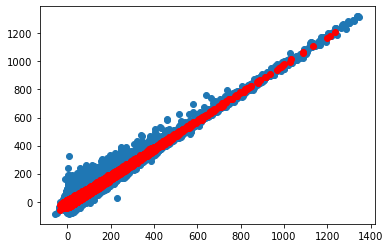

In [87]:
from matplotlib import pyplot as plt

plt.scatter(train_fin.DEPARTURE_DELAY, train_fin.ARRIVAL_DELAY)
plt.scatter(test_fin['DEPARTURE_DELAY'], y_pred, c='r')

In [101]:
temp = train_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','ORIGIN_DEL_PROP','DEST_DEL_PROP','DEPARTURE_DELAY',
                      'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']]

In [104]:
temp.corr()

,DISTANCE,TAXI_OUT,WHEELS_OFF,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
DISTANCE,1.000000,0.069277,-0.025873,0.061893,-0.000789,0.036739,0.115142,0.098755,0.032781
TAXI_OUT,0.069277,1.000000,0.026832,0.071081,0.021647,0.297635,0.151167,0.322783,0.129081
WHEELS_OFF,-0.025873,0.026832,1.000000,0.049295,0.032522,0.169076,-0.000182,0.070523,0.025031
ORIGIN_DEL_PROP,0.061893,0.071081,0.049295,1.000000,0.146924,0.069302,0.156551,0.493673,0.089617
DEST_DEL_PROP,-0.000789,0.021647,0.032522,0.146924,1.000000,0.040251,0.133692,0.100091,0.454633
DEPARTURE_DELAY,0.036739,0.297635,0.169076,0.069302,0.040251,1.000000,0.102447,0.140380,0.088536
AL_DELAY_MEAN,0.115142,0.151167,-0.000182,0.156551,0.133692,0.102447,1.000000,0.398507,0.439016
OR_DELAY_MEAN,0.098755,0.322783,0.070523,0.493673,0.100091,0.140380,0.398507,1.000000,0.312361
DES_DELAY_MEAN,0.032781,0.129081,0.025031,0.089617,0.454633,0.088536,0.439016,0.312361,1.000000


### Regularization

In [106]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()
    
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_pred, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

In [107]:
lambdas = np.arange(-10, 2, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

/Users/suvendukumarpati/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428618601.6840973, tolerance: 458864.4982266822
  model = cd_fast.enet_coordinate_descent(
/Users/suvendukumarpati/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434306778.30953217, tolerance: 458864.4982266822
  model = cd_fast.enet_coordinate_descent(
/Users/suvendukumarpati/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439994955.0154648, tolerance: 458864.4982266822
  model = cd_fast.enet_coordinate_descent(
/Users/suvendukumarpati/anaconda3/lib/python3.8/sit

KeyboardInterrupt: 

In [148]:
lassoreg = Lasso(alpha=2)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)

In [149]:
pd.DataFrame(y_pred, columns=['ARRIVAL_DELAY']).to_csv('submission.csv', index_label='id')

### Gradient Boosting

In [89]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [97]:
params = {
    "n_estimators": 10,
    "max_depth": 10,
    "min_samples_split": 5,
    "learning_rate": 0.01
}

In [98]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=5,
                          n_estimators=10)

In [99]:
y_pred = reg.predict(X_test)

In [100]:
y_pred

array([7.46845667, 4.49183835, 5.78777653, ..., 4.22699657, 4.89511505,
       5.22314275])

In [96]:
pd.DataFrame(y_pred, columns=['ARRIVAL_DELAY']).to_csv('submission.csv', index_label='id')

### Neural Network

In [89]:
import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.7.0


In [94]:
from keras.models import Sequential
from keras.layers import Dense

In [99]:
X_train = train_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','DEPARTURE_DELAY', 
                         'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']].values

y_train = train_fin["ARRIVAL_DELAY"].values

X_test = test_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','DEPARTURE_DELAY', 
                      'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']].values

In [100]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50


2021-12-19 00:42:18.445008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


140927/140927 [==============================] - 509s 4ms/step - loss: 123.8164
Epoch 2/50
140927/140927 [==============================] - 506s 4ms/step - loss: 113.6502
Epoch 3/50
140927/140927 [==============================] - 509s 4ms/step - loss: 112.7252
Epoch 4/50
140927/140927 [==============================] - 725s 5ms/step - loss: 112.3734
Epoch 5/50
140927/140927 [==============================] - 514s 4ms/step - loss: 112.1487
Epoch 6/50
140927/140927 [==============================] - 580s 4ms/step - loss: 111.9888
Epoch 7/50
140927/140927 [==============================] - 505s 4ms/step - loss: 111.9160
Epoch 8/50
140927/140927 [==============================] - 504s 4ms/step - loss: 111.8539
Epoch 9/50
140927/140927 [==============================] - 502s 4ms/step - loss: 111.8103
Epoch 10/50
140927/140927 [==============================] - 508s 4ms/step - loss: 111.7474
Epoch 11/50
140927/140927 [==============================] - 504s 4ms/step - loss: 111.7129
Epoch 12

In [101]:
y_pred = model.predict(X_test)

2021-12-19 10:38:59.407949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [102]:
y_pred

array([[ 25.818235  ],
       [ -7.8115253 ],
       [ -0.36083603],
       ...,
       [-14.902584  ],
       [ -4.3134384 ],
       [ -2.2646408 ]], dtype=float32)

In [103]:
pd.DataFrame(y_pred, columns=['ARRIVAL_DELAY']).to_csv('submission.csv', index_label='id')

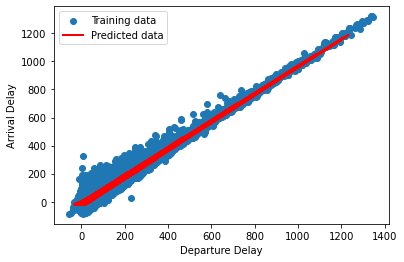

In [143]:
plt.cla()
plt.scatter(train_fin['DEPARTURE_DELAY'].values, train_fin['ARRIVAL_DELAY'].values, label='Training data')
plt.plot(X_test['DEPARTURE_DELAY'].values, y_pred, 'r-', lw=2, label='Predicted data')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.legend()
plt.pause(0.1)

plt.show()

### Normalizing the features

In [105]:
from sklearn.preprocessing import StandardScaler

In [113]:
X_train = train_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','DEPARTURE_DELAY', 
                         'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']]

y_train = train_fin["ARRIVAL_DELAY"].values

X_test = test_fin[['DISTANCE','TAXI_OUT','WHEELS_OFF','DEPARTURE_DELAY', 
                      'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']]

In [111]:
def standScal(df):
    col_names = list(df.columns)

    s_scaler = StandardScaler()
    df_s = s_scaler.fit_transform(df)

    df_s = pd.DataFrame(df_s, columns=col_names)
    
    return df_s

In [114]:
X_train_s = standScal(X_train)
X_test_s = standScal(X_test)

In [115]:
X_train_s.head()

,DISTANCE,TAXI_OUT,WHEELS_OFF,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,1.042230,0.527662,-2.708436,-0.415581,-2.467261,-2.116076,-1.390438
1,2.504050,-0.447804,-2.710450,-0.567517,0.510297,0.044330,1.547183
2,2.447699,-0.014264,-2.670167,-0.314291,-0.329240,0.319914,-0.987076
3,2.523939,-0.122649,-2.678224,-0.415581,0.510297,0.044330,0.676588
4,1.042230,-0.556189,-2.668153,-0.415581,-2.467261,-0.819240,-2.210551


In [117]:
X_test_s.head()

,DISTANCE,TAXI_OUT,WHEELS_OFF,DEPARTURE_DELAY,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,0.607503,-0.565813,-2.541128,0.551240,0.941861,0.197571,-0.711736
1,2.329633,0.521597,-2.601351,-0.296623,0.064688,0.567132,-0.724214
2,1.244082,2.152713,-2.572211,0.088769,-0.324776,1.061512,0.672943
3,0.730970,-0.239590,-2.434281,0.885246,0.941861,0.197571,-0.669032
4,3.211544,0.412856,-2.570268,0.037383,2.364703,-1.409671,0.142699


In [118]:
X_trainf = X_train_s.values
X_testf = X_test_s.values

In [119]:
# create ANN model
model_2 = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_2.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_2.add(Dense(units=6, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_2.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model_2.compile(loss='mean_squared_error', optimizer='adam')
 
# Obtaining the model summary
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 40        
                                                                 
 dense_9 (Dense)             (None, 6)                 36        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [120]:
# Fitting the ANN to the Training set
model_2.fit(X_trainf, y_train ,batch_size = 20, epochs = 30, verbose=1)

Epoch 1/30


2021-12-19 13:04:29.236466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


140927/140927 [==============================] - 511s 4ms/step - loss: 125.7630
Epoch 2/30
140927/140927 [==============================] - 510s 4ms/step - loss: 111.1910
Epoch 3/30
140927/140927 [==============================] - 583s 4ms/step - loss: 110.8813
Epoch 4/30
140927/140927 [==============================] - 498s 4ms/step - loss: 110.7147
Epoch 5/30
140927/140927 [==============================] - 502s 4ms/step - loss: 110.5928
Epoch 6/30
140927/140927 [==============================] - 504s 4ms/step - loss: 110.2372
Epoch 7/30
140927/140927 [==============================] - 508s 4ms/step - loss: 109.9191
Epoch 8/30
140927/140927 [==============================] - 1542s 11ms/step - loss: 109.6968
Epoch 9/30
140927/140927 [==============================] - ETA: 0s - loss: 109.674 - 1021s 7ms/step - loss: 109.6746
Epoch 10/30
140927/140927 [==============================] - 508s 4ms/step - loss: 109.6512
Epoch 11/30
140927/140927 [==============================] - 880s 6ms/s

In [124]:
y_pred_2 = model_2.predict(X_test_s)

In [125]:
y_pred_2

array([[ 29.729164 ],
       [-13.557335 ],
       [  1.086473 ],
       ...,
       [-13.876238 ],
       [ -2.797766 ],
       [ -3.1132147]], dtype=float32)

In [126]:
y_pred

array([[ 25.818235  ],
       [ -7.8115253 ],
       [ -0.36083603],
       ...,
       [-14.902584  ],
       [ -4.3134384 ],
       [ -2.2646408 ]], dtype=float32)

In [127]:
pd.DataFrame(y_pred_2, columns=['ARRIVAL_DELAY']).to_csv('submission.csv', index_label='id')